These findings guide commercial teams to distribute vouchers and discounts at optimal timings to maximize  performance .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/azharansari/Desktop/food_orders_new_delhi (1).csv')
df.shape

(1000, 12)

In [4]:
df.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [6]:
df["Order Date and Time"]=pd.to_datetime(df['Order Date and Time'] )
df["Delivery Date and Time"]=pd.to_datetime(df['Delivery Date and Time'] )

In [7]:
df.describe()

,Order ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,2024-01-20 11:03:07.648000,2024-01-20 12:16:42.148000256,1053.969000,28.620000,126.99000,29.832000,28.300000
min,1.000000,2024-01-01 02:12:47,2024-01-01 03:59:47,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,2024-01-11 18:45:27.249999872,2024-01-11 19:54:57.249999872,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,2024-01-20 11:38:43,2024-01-20 13:02:23,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,2024-01-30 03:47:34.249999872,2024-01-30 05:09:34.249999872,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,2024-02-07 23:56:12,2024-02-08 01:45:12,1995.000000,50.000000,200.00000,50.000000,150.000000
std,288.819436,NaN,NaN,530.975339,16.958278,43.06405,11.627165,49.614228


In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['order_id', 'customer_id', 'restaurant_id', 'order_date_and_time',
       'delivery_date_and_time', 'order_value', 'delivery_fee',
       'payment_method', 'discounts_and_offers', 'commission_fee',
       'payment_processing_fee', 'refunds/chargebacks'],
      dtype='object')

In [9]:
df['discounts_and_offers'].value_counts()


discounts_and_offers
10%             233
50 off Promo    201
15% New User    198
5% on App       183
Name: count, dtype: int64

In [10]:
def extract_percentage(offer):
    offer = str(offer)
    if '%' in offer:
        return int(str(offer).split('%')[0])
    return 0

In [11]:
def extract_cash(offer):
    offer = str(offer)
    words = offer.split( )
    for word in words:
        if word.isdigit():
            return int(word)
    return 0

In [12]:
df['discount_pct'] = df['discounts_and_offers'].apply(extract_percentage)
df['discount_cash'] = df['discounts_and_offers'].apply(extract_cash)

df[['discount_pct', 'discount_cash']]

,discount_pct,discount_cash
0,5,0
1,10,0
2,15,0
3,0,0
4,0,50
...,...,...
995,5,0
996,0,0
997,0,0
998,15,0


Text(0.5, 1.0, 'Delivery and Payment Processing Fees')

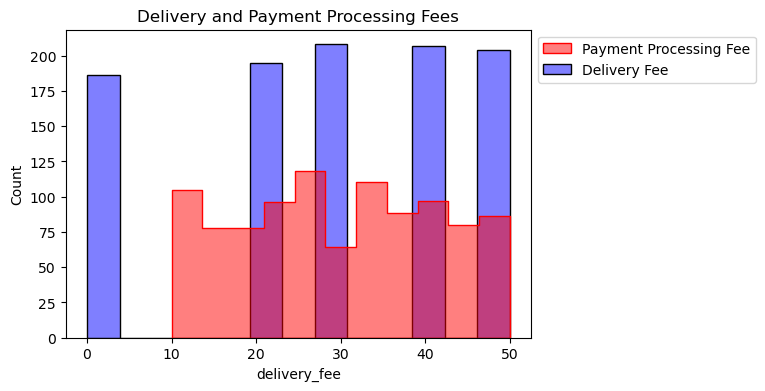

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['delivery_fee'],color='blue', label='Delivery Fee', alpha=0.5)
sns.histplot(df['payment_processing_fee'],  color='red', label='Payment Processing Fee', alpha=0.5, element="step")

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Delivery and Payment Processing Fees')

In [14]:
df['cost'] = (df['delivery_fee'] + df['payment_processing_fee'] + df['discount_cash']) * (100 + df['discount_pct']) / 100
df.head()

,order_id,customer_id,restaurant_id,order_date_and_time,delivery_date_and_time,order_value,delivery_fee,payment_method,discounts_and_offers,commission_fee,payment_processing_fee,refunds/chargebacks,discount_pct,discount_cash,cost
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5,0,49.35
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10,0,69.30
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15,0,86.25
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0,0,77.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,50,130.00


In [15]:
df['cost'] = (df['delivery_fee'] + df['payment_processing_fee'] + df['discount_cash']) * (100 + df['discount_pct']) / 100
df.head()

,order_id,customer_id,restaurant_id,order_date_and_time,delivery_date_and_time,order_value,delivery_fee,payment_method,discounts_and_offers,commission_fee,payment_processing_fee,refunds/chargebacks,discount_pct,discount_cash,cost
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5,0,49.35
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10,0,69.30
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15,0,86.25
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0,0,77.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,50,130.00


In [16]:
df['revenue'] = df['commission_fee']
df['profits'] = df['revenue'] - df['cost']
df['have_profits'] = df['profits'].apply(lambda x: 1 if x > 0 else 0)


Cost Analysis

In [17]:
df['cost_from_offers'] = df['cost'] - df['payment_processing_fee'] - df['delivery_fee'] 

In [18]:
df['discounts_and_offers'] = df['discounts_and_offers'].fillna('No Offer')

<Axes: xlabel='discounts_and_offers'>

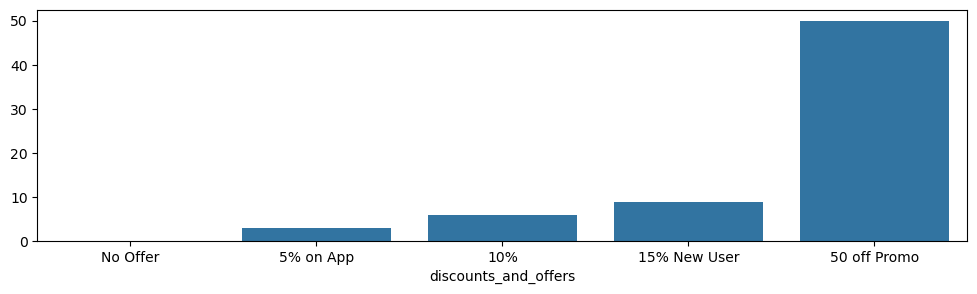

In [19]:
plt.figure(figsize=(12, 3))
avg_cost = df.groupby('discounts_and_offers')['cost_from_offers'].mean().sort_values()
sns.barplot(x=avg_cost.index, y=avg_cost.values)

([0, 1, 2, 3, 4],
 [Text(0, 0, '50 off Promo'),
  Text(1, 0, '15% New User'),
  Text(2, 0, '10%'),
  Text(3, 0, '5% on App'),
  Text(4, 0, 'No Offer')])

<Figure size 1200x300 with 0 Axes>

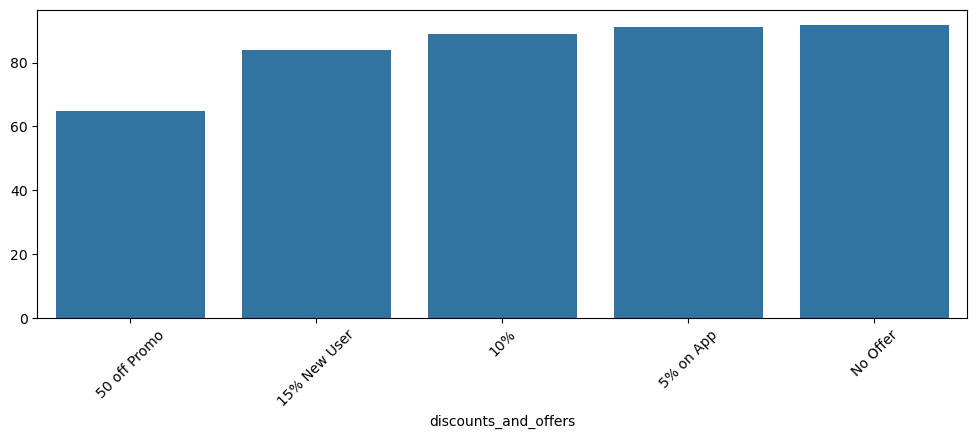

In [20]:
plt.figure(figsize=(12, 3))

profit_counts = df.groupby('discounts_and_offers')['have_profits'].sum()
total_counts = df['discounts_and_offers'].value_counts()
profit_percentage = (profit_counts / total_counts * 100).sort_values()

plt.figure(figsize=(12, 4))
sns.barplot(x=profit_percentage.index, y=profit_percentage.values)
plt.xticks(rotation=45)

In [21]:
df

,order_id,customer_id,restaurant_id,order_date_and_time,delivery_date_and_time,order_value,delivery_fee,payment_method,discounts_and_offers,commission_fee,payment_processing_fee,refunds/chargebacks,discount_pct,discount_cash,cost,revenue,profits,have_profits,cost_from_offers
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5,0,49.35,150,100.65,1,2.35
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10,0,69.30,198,128.70,1,6.30
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15,0,86.25,195,108.75,1,11.25
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Offer,146,27,0,0,0,77.00,146,69.00,1,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0,50,130.00,130,0.00,0,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5,0,49.35,165,115.65,1,2.35
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No Offer,110,42,0,0,0,92.00,110,18.00,1,0.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No Offer,64,31,0,0,0,51.00,64,13.00,1,0.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,15,0,39.10,199,159.90,1,5.10


In [22]:
profits_orders = df.groupby('discounts_and_offers').agg({'profits': 'sum', 'cost': 'count'}).reset_index()
profits_orders.rename(columns={'cost': 'total_orders'}, inplace=True)
profits_orders

,discounts_and_offers,profits,total_orders
0,10%,14780.7,233
1,15% New User,11636.7,198
2,5% on App,11919.5,183
3,50 off Promo,4327.0,201
4,No Offer,12224.0,185


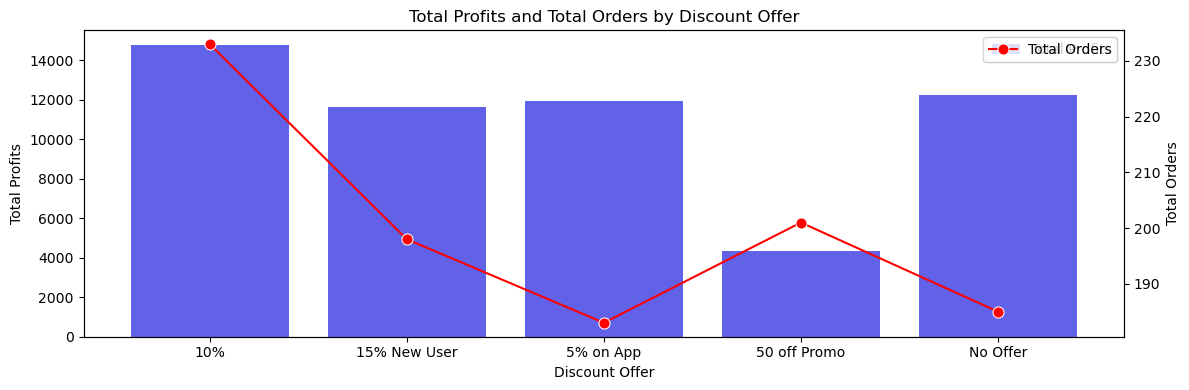

In [23]:
plt.figure(figsize=(12, 4))

ax1 = sns.barplot(x='discounts_and_offers', y='profits', data=profits_orders, color='blue', alpha=0.7, label='Total Profits')
ax2 = ax1.twinx()
sns.lineplot(x='discounts_and_offers', y='total_orders', data=profits_orders, color='red', marker='o', markersize=8, ax=ax2, label='Total Orders')

ax1.set_title('Total Profits and Total Orders by Discount Offer')
ax1.set_xlabel('Discount Offer')
ax1.set_ylabel('Total Profits')
ax2.set_ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [24]:
df['order_date'] = df['order_date_and_time'].dt.date
df['order_time'] = df['order_date_and_time'].dt.time
df['delivery_date'] = df['delivery_date_and_time'].dt.date
df['delivery_time'] = df['delivery_date_and_time'].dt.time

In [25]:
df.set_index('order_date', inplace=True) # set order date as index for TSA (row bna rhe)
df.index = pd.to_datetime(df.index)

In [26]:
df


,order_id,customer_id,restaurant_id,order_date_and_time,delivery_date_and_time,order_value,delivery_fee,payment_method,discounts_and_offers,commission_fee,...,discount_pct,discount_cash,cost,revenue,profits,have_profits,cost_from_offers,order_time,delivery_date,delivery_time
order_date,,,,,,,,,,,,,,,,,,,,,
2024-02-01,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,5,0,49.35,150,100.65,1,2.35,01:11:52,2024-02-01,02:39:52
2024-02-02,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,10,0,69.30,198,128.70,1,6.30,22:11:04,2024-02-02,22:46:04
2024-01-31,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,15,0,86.25,195,108.75,1,11.25,05:54:35,2024-01-31,06:52:35
2024-01-16,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Offer,146,...,0,0,77.00,146,69.00,1,0.00,22:52:49,2024-01-16,23:38:49
2024-01-29,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,50,130.00,130,0.00,0,50.00,01:19:30,2024-01-29,02:48:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-14,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,...,5,0,49.35,165,115.65,1,2.35,05:57:00,2024-01-14,06:39:00
2024-01-28,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No Offer,110,...,0,0,92.00,110,18.00,1,0.00,08:50:43,2024-01-28,10:10:43
2024-01-21,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No Offer,64,...,0,0,51.00,64,13.00,1,0.00,09:43:19,2024-01-21,10:44:19


Seasonality

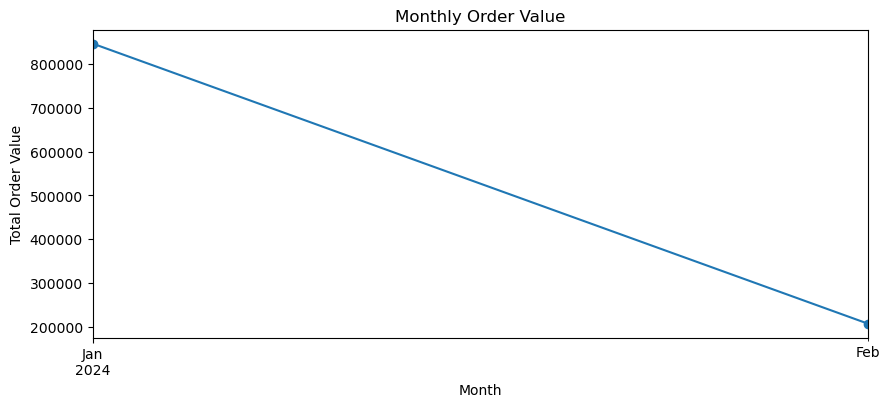

In [27]:
plt.figure(figsize=(10,4))
df['order_value'].resample('M').sum().plot(marker='o', linestyle='-')
plt.title('Monthly Order Value')
plt.xlabel('Month')
plt.ylabel('Total Order Value')
plt.show()

Text(0, 0.5, 'Number of Orders')

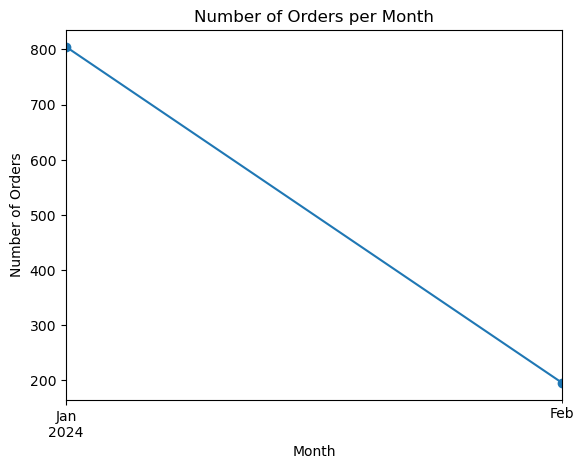

In [28]:
orders_per_month = df.resample('M').size()
orders_per_month.plot(marker='o', linestyle='-')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')


([<matplotlib.axis.XTick at 0x176c84470>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

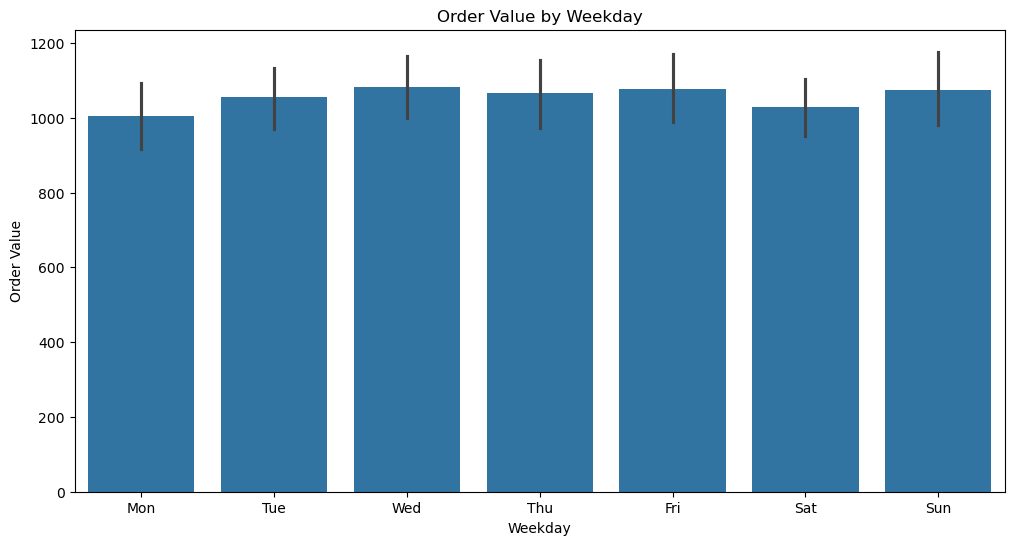

In [29]:
plt.figure(figsize=(12, 6))
df['weekday'] = df.index.dayofweek  # Monday=0, Sunday=6
sns.barplot(x='weekday', y='order_value', data=df)
plt.title('Order Value by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Value')
plt.xticks( ticks=range(7),labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

([<matplotlib.axis.XTick at 0x176d4b950>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

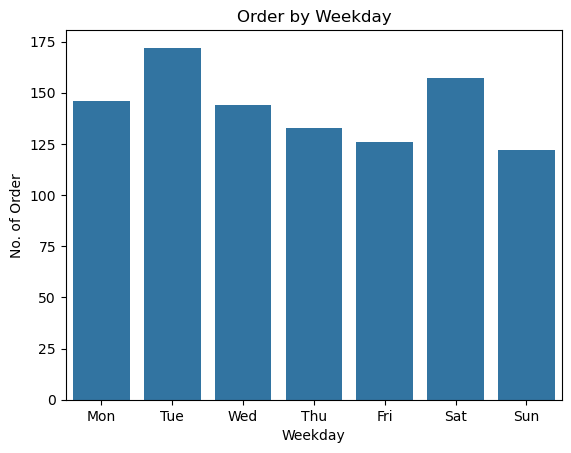

In [30]:
orders_per_weekday = df.groupby(df.index.dayofweek).size()
sns.barplot(x=orders_per_weekday.index, y=orders_per_weekday.values)
plt.title('Order by Weekday')
plt.xlabel('Weekday')
plt.ylabel('No. of Order')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

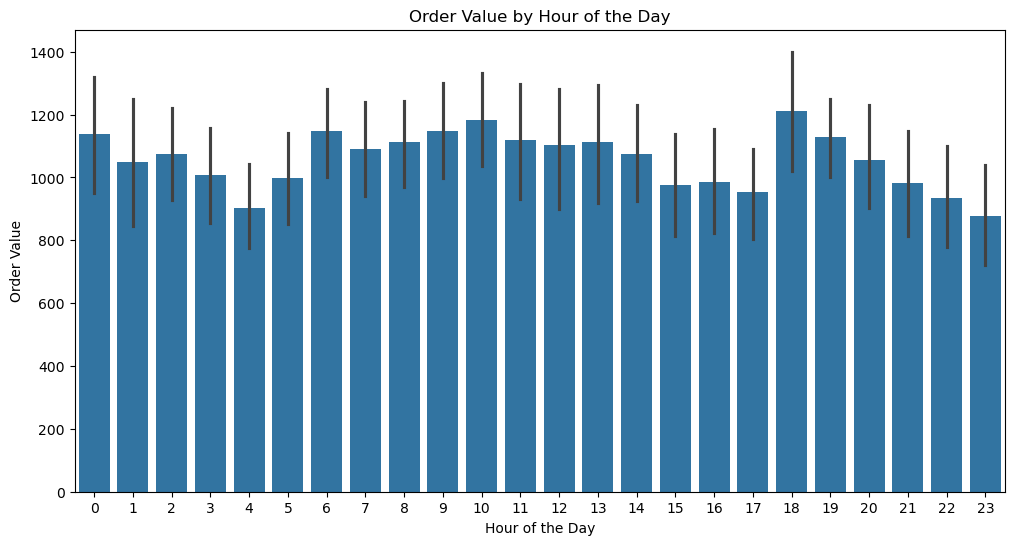

In [31]:
plt.figure(figsize=(12, 6))
df['order_hour'] = df['order_date_and_time'].dt.hour
sns.barplot(x='order_hour', y='order_value', data=df)
plt.title('Order Value by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Value')
plt.show()

In [32]:
breakfast_range = (5, 11)  
lunch_range = (11, 15)    
dinner_range = (15, 22)    
supper_range = (22, 5)     

def categorize_time(hour):
    if breakfast_range[0] <= hour < breakfast_range[1]:
        return 'Breakfast'
    elif lunch_range[0] <= hour < lunch_range[1]:
        return 'Lunch'
    elif dinner_range[0] <= hour < dinner_range[1]:
        return 'Dinner'
    else:
        return 'Supper'


In [33]:
df['time_category'] = df['order_date_and_time'].dt.hour.apply(categorize_time)
avg_values = df.groupby('time_category').agg({'order_value': 'mean', 'profits': 'mean'}).reset_index()
avg_values


,time_category,order_value,profits
0,Breakfast,1112.420290,54.115036
1,Dinner,1038.445205,55.378938
2,Lunch,1102.213793,52.094138
3,Supper,989.177700,56.543031


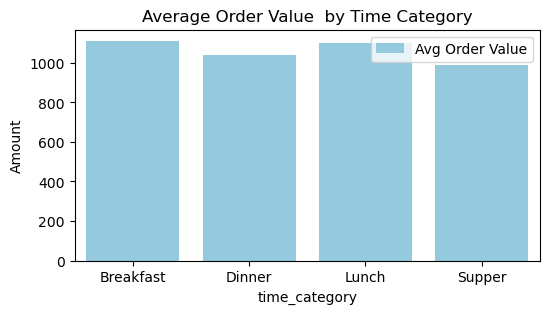

In [34]:
plt.figure(figsize=(6,3))
sns.barplot(x='time_category', y='order_value', data=avg_values, color='skyblue', label='Avg Order Value')
plt.title('Average Order Value  by Time Category')
plt.ylabel('Amount')
plt.show()

Text(0.5, 1.0, 'Profit by Time Category')

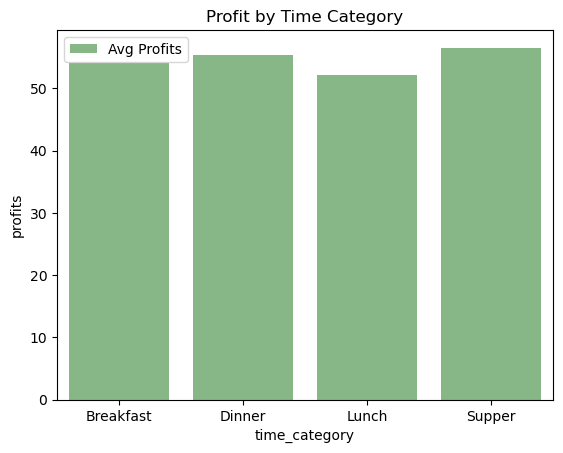

In [35]:
sns.barplot(x='time_category', y='profits', data=avg_values, color='green', label='Avg Profits',alpha=0.5)
plt.title('Profit by Time Category')

Text(0.5, 1.0, 'Orders By time_category.values')

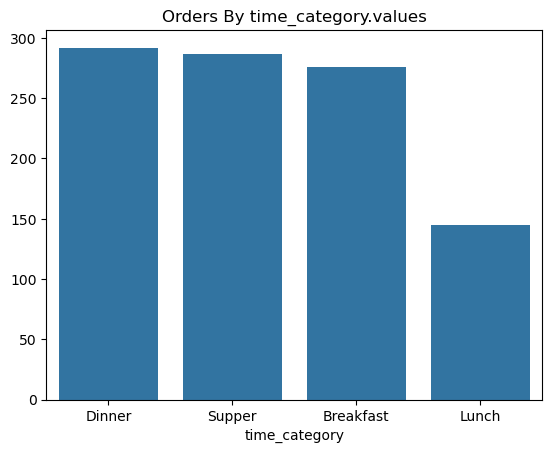

In [36]:
orders_per_time_category = df['time_category'].value_counts()
sns.barplot(x=orders_per_time_category.index, y=orders_per_time_category.values)
plt.title('Orders By time_category.values')